In [5]:
# # #!pip install openpyxl!
# # !pip install seaborn
# # !pip install matplotlib
# # !pip install math
# # !pip install humanize
# # !pip install openpyxl
# # !pip install pandas
# # #!pip install humanize
# !pip install -U pandas
# !pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import humanize
import sklearn as sl

# 1. Data Exploration

The given dataset is a dataset of the power consumption of a programmable CNC milling machine with the corresponding process features. A row represents a process with its properties, timestamps and power consumption. During a process the tool can be changed multiple times. You can see en example of the process here https://www.youtube.com/watch?v=PK8MLLqH7mU

Target
- processing_time
- average_power_consumption

In [7]:
df_cnc = pd.read_excel("/Users/apple/Downloads/DAwithSCM_Project-main/data/CNCmachine/CNC-Milling Machine_Production data.xlsx")
display(df_cnc.head())
print(f"The number of row: {df_cnc.shape[0]}")
print(f"The number of column: {df_cnc.shape[1]}")

,start_time,end_time,processing_time,average_power_consumption,number_of_missing_datapoints,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
0,1649055030,1649055950,920,23582271739130432,0,136659600,5809,5,11,6,79438718501135840,15894074969770256,4343264812575575,4010019001554673,3977633442736224,11971497667991020,36788711932266936
1,1649056780,1649057100,320,25380875,0,136659600,462,4,13,7,78655669160619040,1148868778280543,28009049773755656,4208144796380091,28494117647058824,5610369532428357,182943409943081
2,1649237400,1649237800,400,26181281407035176,10,420000,234,2,5,3,7269291649018721,12126168224299066,5289719626168225,4107476635514018,1584158878504673,7263715661992795,20428703826796160
3,1649243450,1649243800,350,3386402857142857,0,420000,234,2,5,3,7269291649018721,12126168224299066,5289719626168225,4107476635514018,1584158878504673,7263715661992795,20428703826796160
4,1649243850,1649244200,350,3306637142857143,0,420000,234,2,5,3,7269291649018721,12126168224299066,5289719626168225,4107476635514018,1584158878504673,7263715661992795,20428703826796160


The number of row: 220
The number of column: 17


# 2. Analysis

## 2.1 Scatter plot

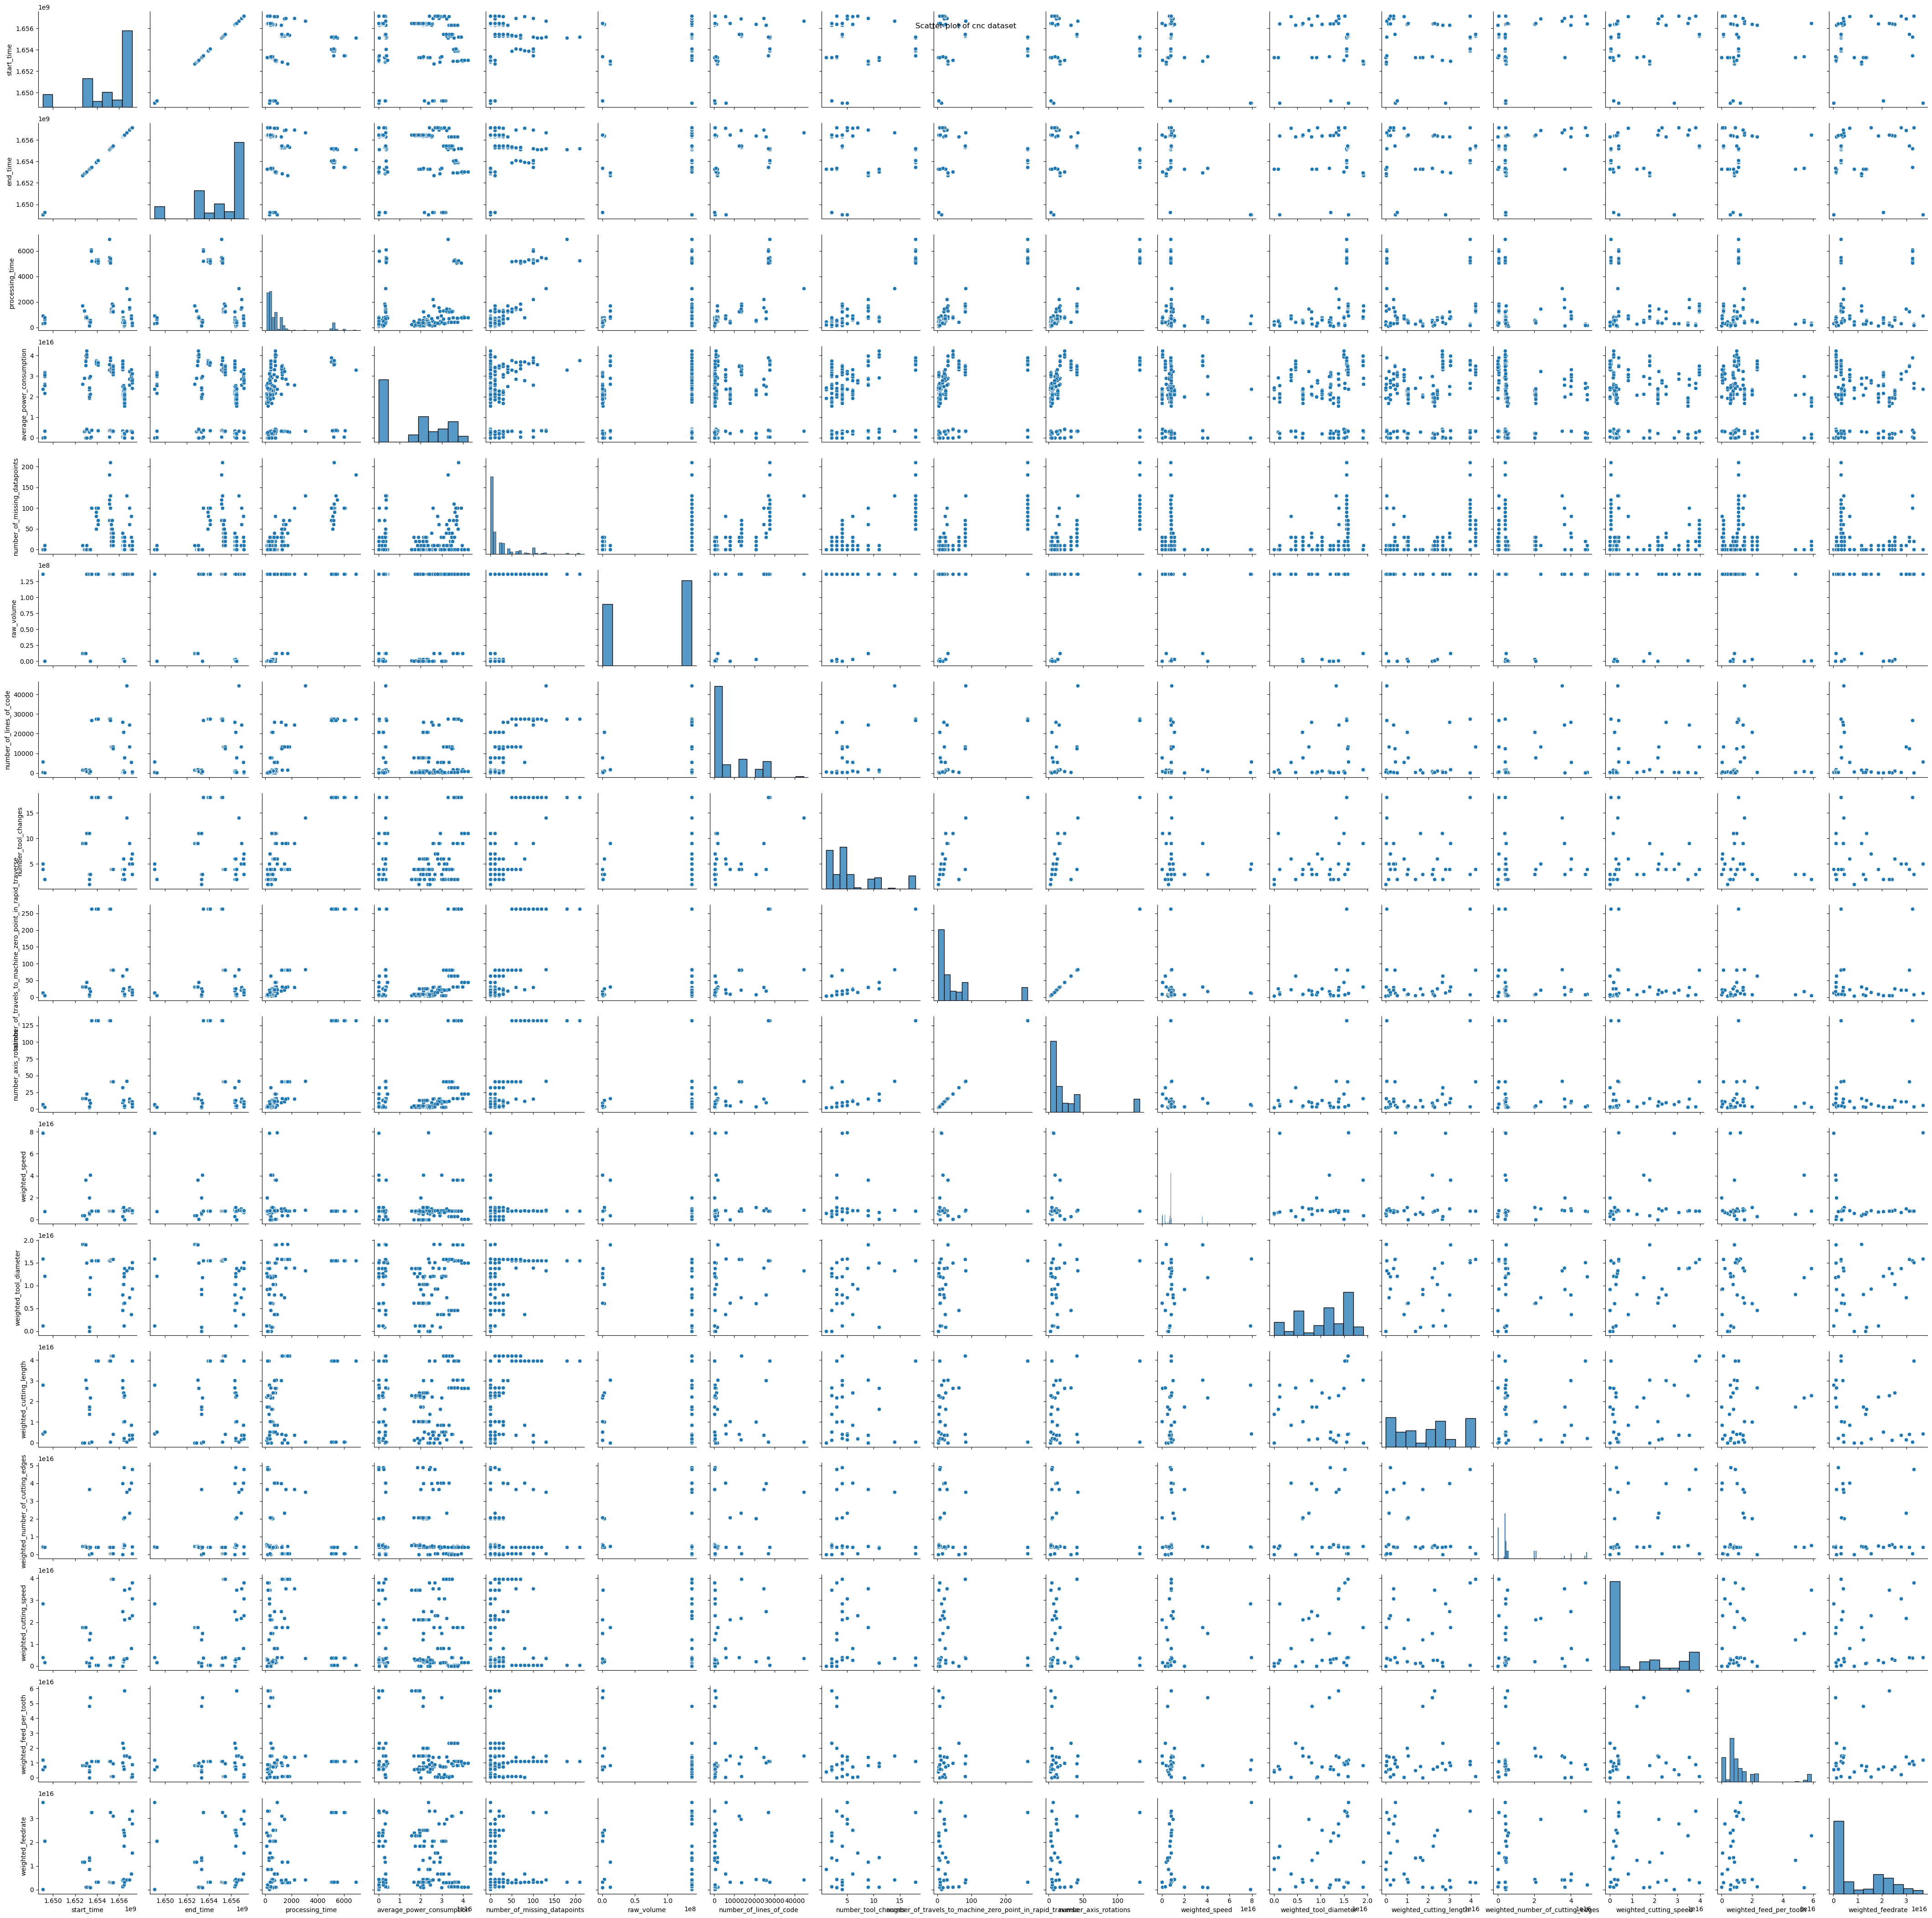

In [8]:
df_plot = df_cnc.copy()

g = sns.pairplot(df_plot)
g.fig.suptitle('Scatter plot of cnc dataset')
plt.tight_layout()
plt.show()

## 2.2 Heatmap

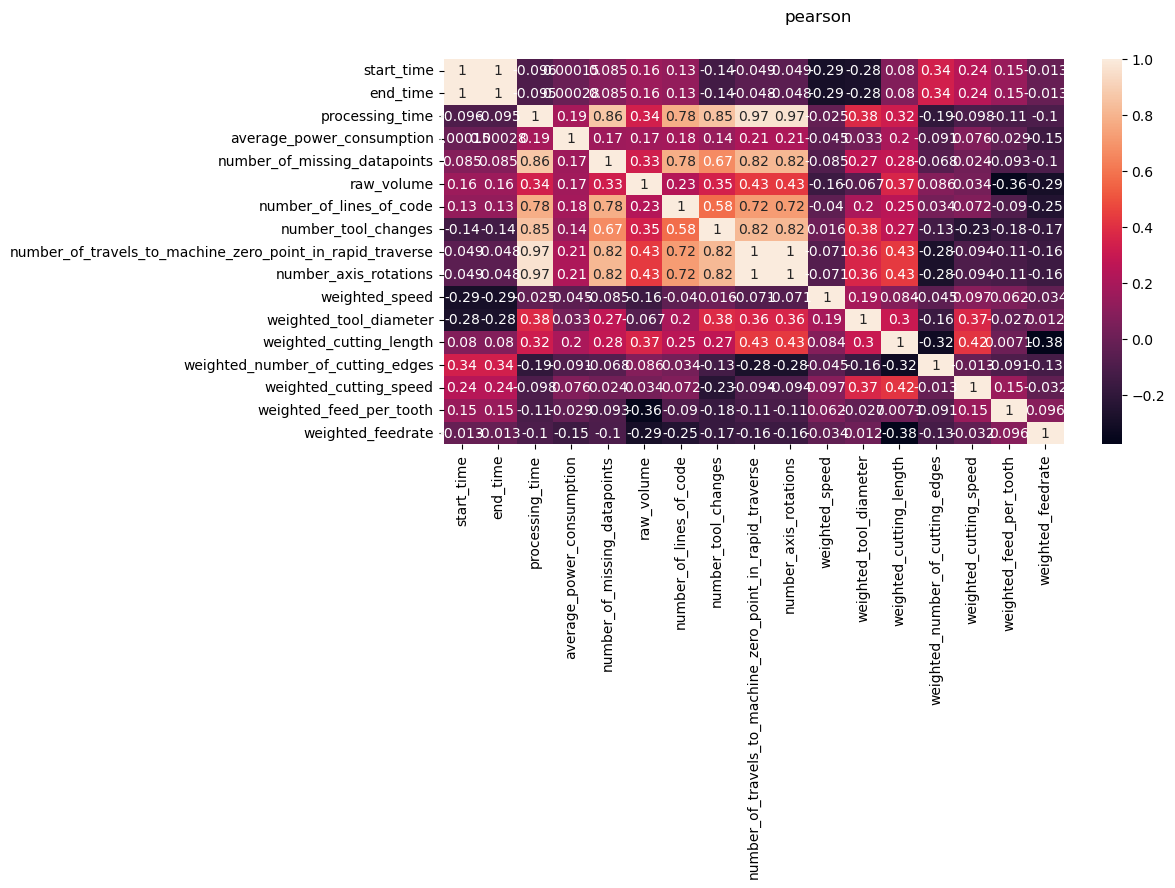

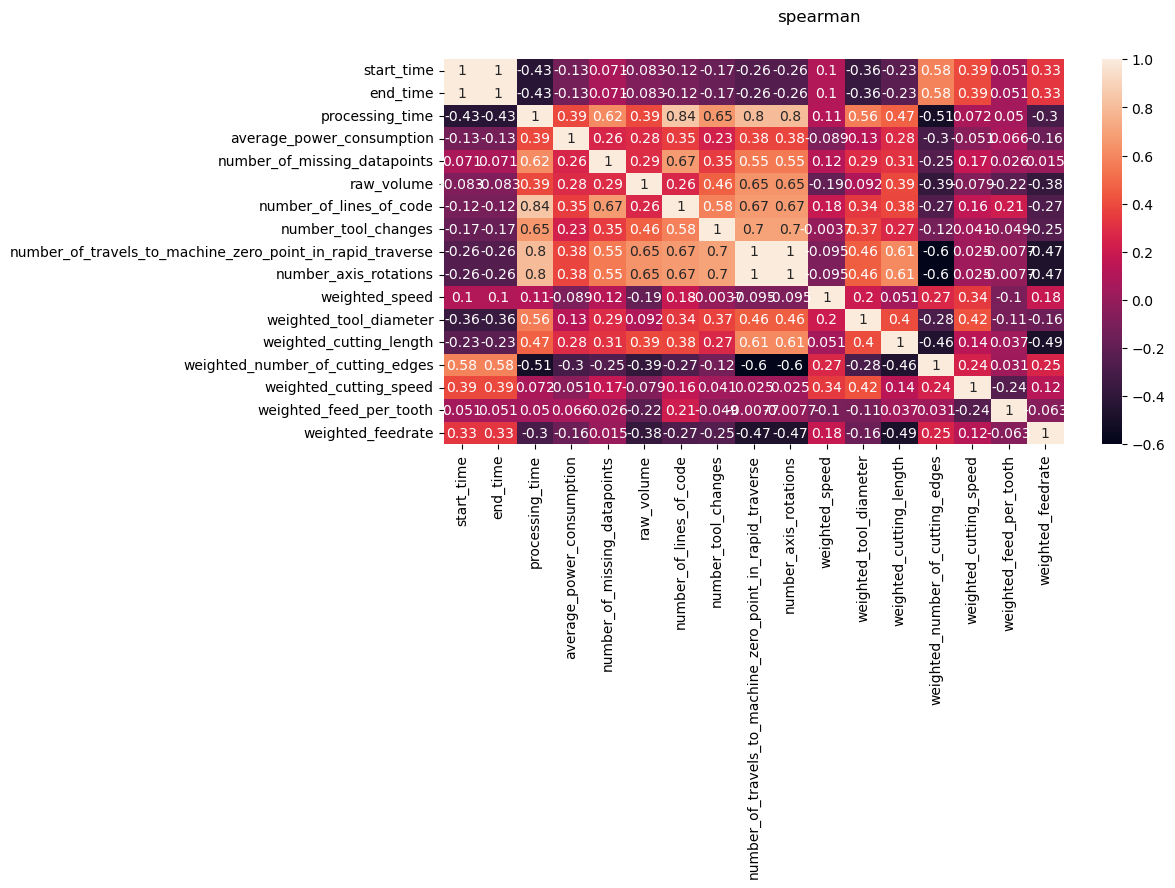

In [9]:
items = ['pearson', 'spearman']
for item in items:
    fig, axe = plt.subplots(figsize=(10,5))
    fig.suptitle(item)
    sns.heatmap(df_cnc.corr(method=item, numeric_only=True), annot=True)
    plt.show()


### 2.2.1 Correlation for processing_time

In [10]:
df_cnc.corr(method='pearson', numeric_only=True).sort_values('processing_time', ascending=False)['processing_time']

processing_time                                              1.000000
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.966316
number_axis_rotations                                        0.966316
number_of_missing_datapoints                                 0.863548
number_tool_changes                                          0.853962
number_of_lines_of_code                                      0.784716
weighted_tool_diameter                                       0.381967
raw_volume                                                   0.336831
weighted_cutting_length                                      0.318705
average_power_consumption                                    0.188783
weighted_speed                                              -0.025400
end_time                                                    -0.095305
start_time                                                  -0.095957
weighted_cutting_speed                                      -0.098022
weighted_feedrate   

**processing_time** has very highly linear correlation with the following features.
- number_of_travels_to_machine_zero_point_in_rapid_traverse
- number_axis_rotations
- number_of_missing_datapoints
- number_tools_changes
- number_of_lines_of_code

In [11]:
df_cnc.corr(method='spearman', numeric_only=True).sort_values('processing_time', ascending=False)['processing_time']

processing_time                                              1.000000
number_of_lines_of_code                                      0.841590
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.802062
number_axis_rotations                                        0.802062
number_tool_changes                                          0.652762
number_of_missing_datapoints                                 0.616476
weighted_tool_diameter                                       0.562307
weighted_cutting_length                                      0.473984
average_power_consumption                                    0.392470
raw_volume                                                   0.391840
weighted_speed                                               0.107656
weighted_cutting_speed                                       0.072152
weighted_feed_per_tooth                                      0.049674
weighted_feedrate                                           -0.300365
end_time            

By using spearman, most of the correlated features with **processing_time** are similar. However, there are some columns that has a monotonic relation with the target as below.
- weighted_tool_diameter
- weighted_number_of_cutting_edges
- weighted_feedrate

In conclusion, the following features might be features for **processing_time**
- number_of_travels_to_machine_zero_point_in_rapid_traverse
- number_axis_rotations
- number_of_missing_datapoints
- number_tools_changes
- number_of_lines_of_code
- weighted_tool_diameter
- weighted_number_of_cutting_edges
- weighted_feedrate

### 2.2.2 Correlation for average_power_consumption

In [12]:
df_cnc.corr(method='pearson', numeric_only=True).sort_values('average_power_consumption', ascending=False)['average_power_consumption']

average_power_consumption                                    1.000000
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.212727
number_axis_rotations                                        0.212727
weighted_cutting_length                                      0.202067
processing_time                                              0.188783
number_of_lines_of_code                                      0.184588
raw_volume                                                   0.174706
number_of_missing_datapoints                                 0.167220
number_tool_changes                                          0.144057
weighted_cutting_speed                                       0.075718
weighted_tool_diameter                                       0.032825
end_time                                                     0.000278
start_time                                                   0.000154
weighted_feed_per_tooth                                     -0.028836
weighted_speed      

Even though there is no highly correlated feature with **average_power_consumption** using linear function, the columns below are worth looking as a featrues for the target.
- number_of_travels_to_machine_zero_point_in_rapid_traverse
- number_axis_rotations
- weighted_cutting_length

In [13]:
df_cnc.corr(method='spearman', numeric_only=True).sort_values('average_power_consumption', ascending=False)['average_power_consumption']

average_power_consumption                                    1.000000
processing_time                                              0.392470
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.379675
number_axis_rotations                                        0.379675
number_of_lines_of_code                                      0.352183
raw_volume                                                   0.284420
weighted_cutting_length                                      0.282016
number_of_missing_datapoints                                 0.257037
number_tool_changes                                          0.231078
weighted_tool_diameter                                       0.126745
weighted_feed_per_tooth                                      0.066230
weighted_cutting_speed                                      -0.051061
weighted_speed                                              -0.089198
start_time                                                  -0.125936
end_time            

As same as pearson there is also no highly correlated feature with **average_power_consumption** using monotonic function. However, there  some more columns that could be a candidate as features.
- processing_time
- number_of_lines_of_code
- weighted_number_of_cutting_edges

In conclusion, the following features might be features for **average_power_consumption**
- number_of_travels_to_machine_zero_point_in_rapid_traverse
- number_axis_rotations
- weighted_cutting_length
- processing_time
- number_of_lines_of_code
- weighted_number_of_cutting_edges

## 2.3 Boxplot

In [14]:
def coolReshape(a_list, row_num, col_num):
    a_list = np.pad(a_list,
        (0, row_num*col_num - len(a_list)), 
        mode='constant', 
        constant_values=np.nan).reshape(row_num,col_num)
    return a_list.tolist()

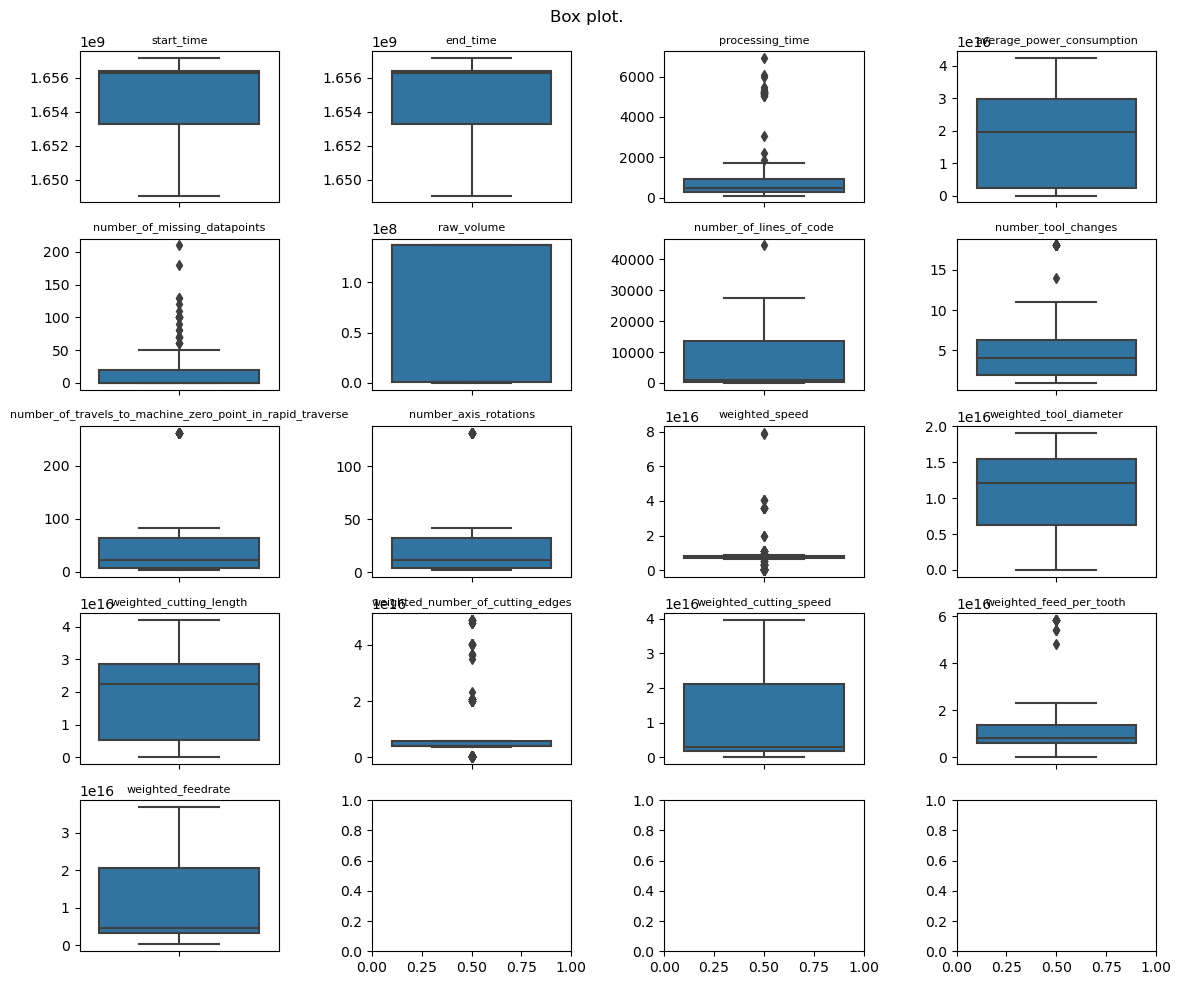

In [15]:
df_plot = df_cnc.copy()
row_num = 5
col_num = math.ceil(len(df_cnc.columns)/row_num)
column_list = coolReshape(df_cnc.columns.to_list(), row_num, col_num)

fig, axe = plt.subplots(row_num, col_num, figsize=(col_num*3,row_num*2))
fig.suptitle('Box plot.')
for i, row in enumerate(column_list):
    for j, column in enumerate(row):
        try:
            sns.boxplot(data=df_plot, y=column, ax=axe[i][j])
            axe[i][j].set_title(column, fontsize=8)
            axe[i][j].set_ylabel(" ")
        except:
            pass
plt.tight_layout()
plt.show()

## 2.4 Distribution

In [16]:
def distributionValue(df):
    df_temp = df.copy()
    df_temp.dropna(inplace=True)
    a_dict = {}
    a_dict['mean'] = df_temp.mean()
    a_dict['median'] = df_temp.median()
    a_dict['std'] = df_temp.std()
    a_dict['skewness'] = df_temp.skew()
    a_dict['kurtosis'] = df_temp.kurtosis()

    return a_dict

def plotpdf(df, x, axe, bins=15, kde=True, hue=None):
    df_temp = df.copy()
    def annotate(**kws):
        value = distributionValue(df_temp[x])
        bbox = dict(boxstyle="round,pad=0.3", alpha=0.3, fc="white", ec="grey", lw=1)
        annotate_value = (f"STAT\n"
                          f"mean: {humanize.scientific(value['mean'])}\n"
                          f"std: {humanize.scientific(value['std'])}\n"
                          f"skew: {humanize.scientific(value['skewness'])}\n"
                          f"kurt: {humanize.scientific(value['kurtosis'])}")
        #ax = plt.gca()
        if value['skewness'] < 0:
            x_anotate = 0.05
        else:
            x_anotate = 0.65
        axe.annotate(annotate_value, xy=(x_anotate, .45), xycoords=axe.transAxes, fontsize=12, bbox=bbox)

    sns.histplot(df_temp, x=x, kde=kde, ax=axe, bins=bins, hue=hue)
    axe.set_title(x)
    axe.tick_params(axis='x', width=2, length=7, direction='inout', rotation=15, labelsize=12)
    axe.tick_params(axis='y', width=2, length=7, direction='inout', rotation=0, labelsize=12)
    axe.set(xlabel=None)
    axe.set(ylabel=None)
    plt.tight_layout()
    annotate()
    return axe


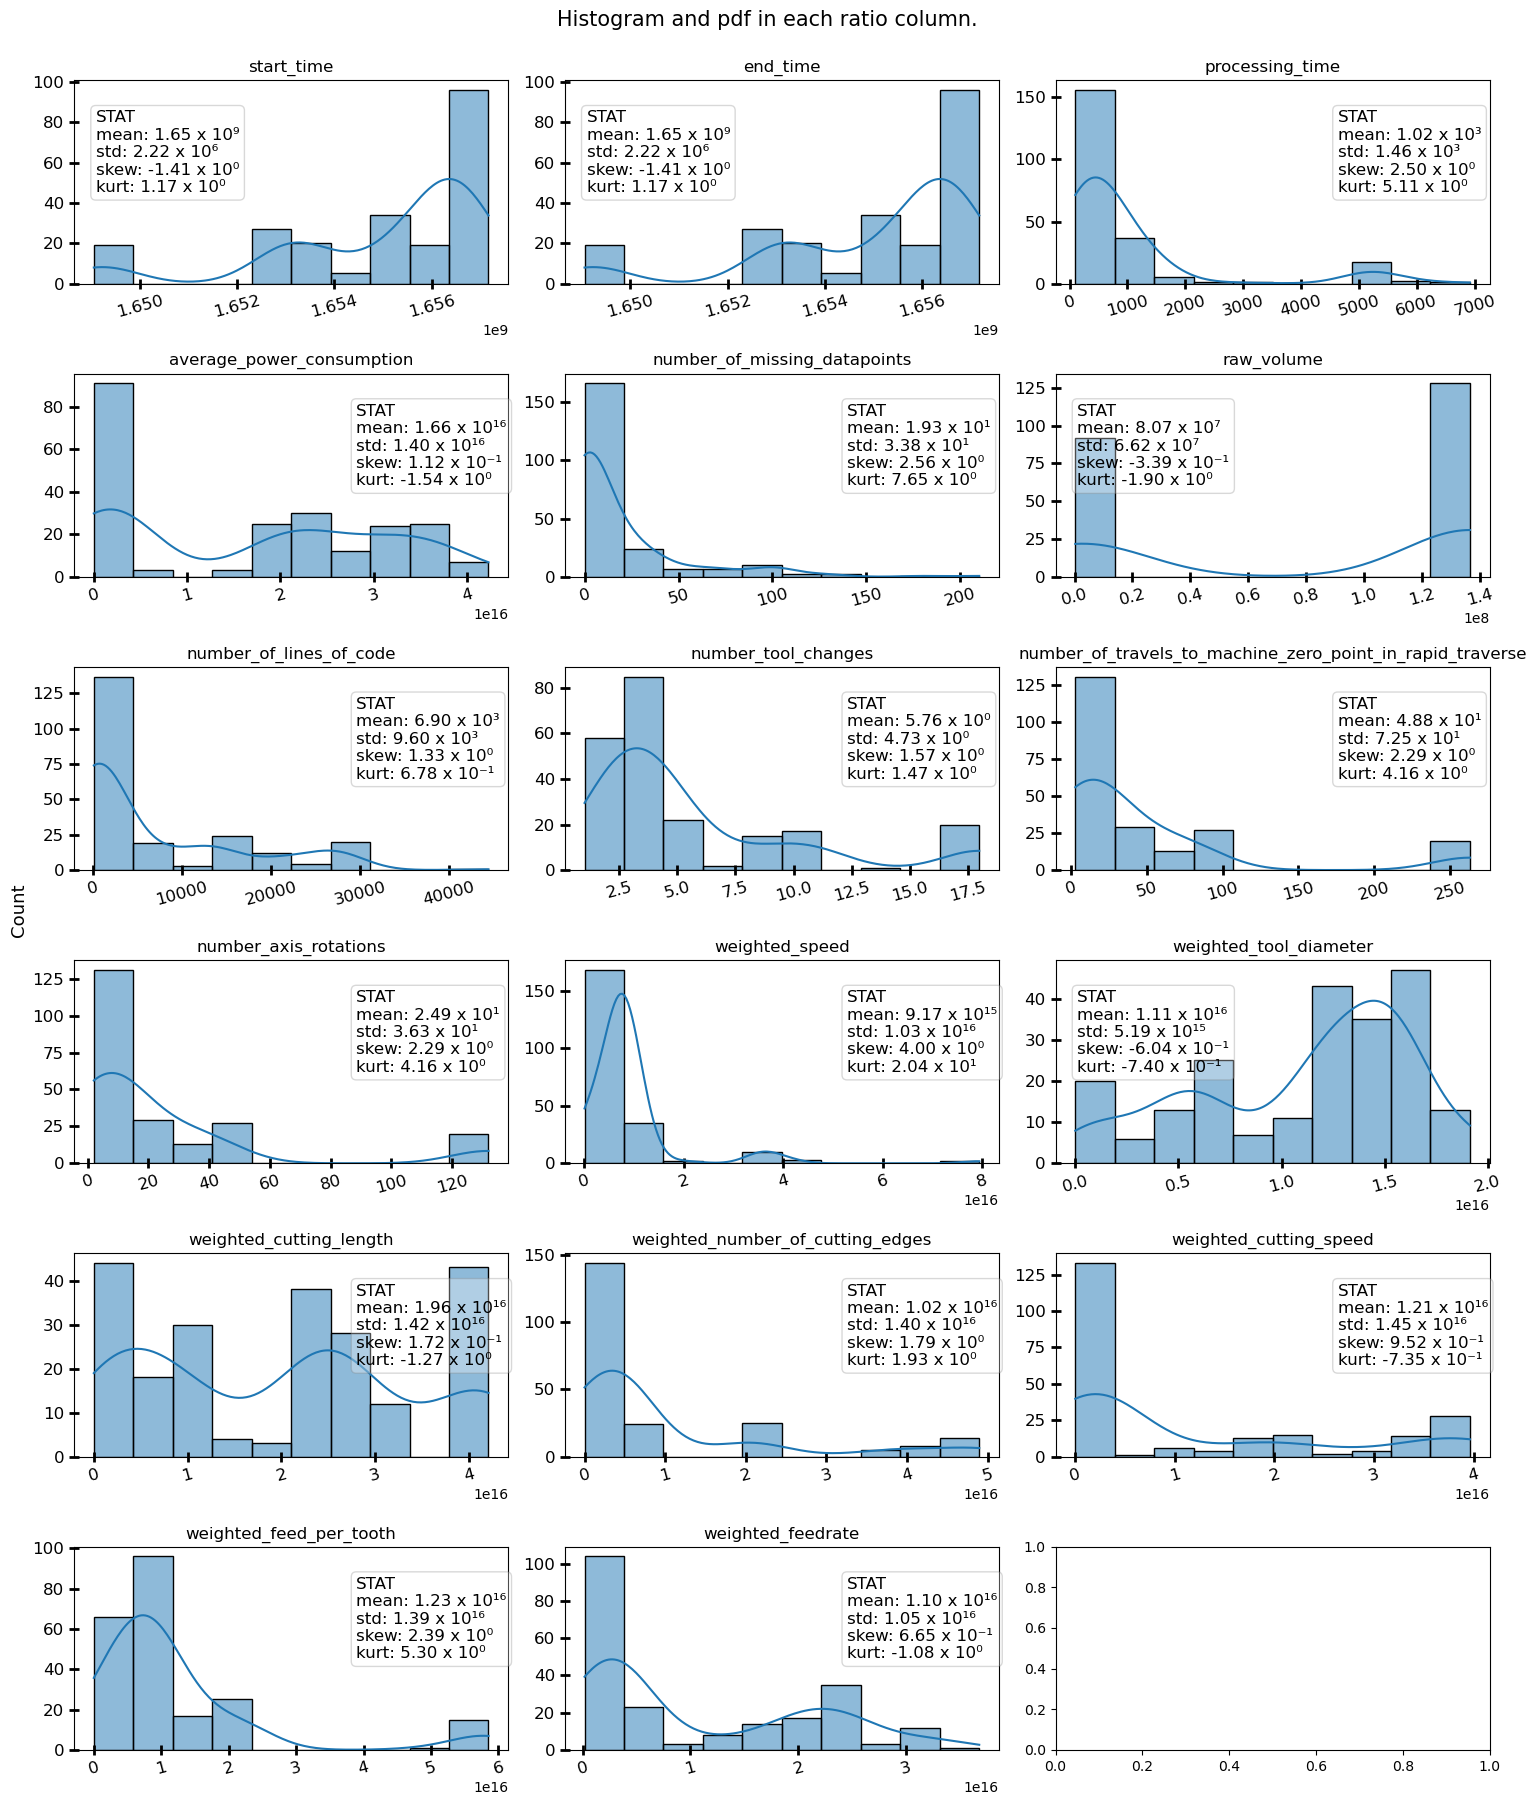

In [17]:
df_plot = df_cnc.copy()
row_num = 6
col_num = math.ceil(len(df_cnc.columns)/row_num)
column_list = coolReshape(df_cnc.columns.to_list(), row_num, col_num)

fig, axe = plt.subplots(row_num, col_num, figsize=(col_num*5,row_num*3))
fig.suptitle('Histogram and pdf in each ratio column.', size=15, y=1)

for i, row in enumerate(column_list):
    for j, column in enumerate(row):
        try:
            plotpdf(df_plot, column, axe[i][j], bins=10)
            axe[i][j].set_title(column, fontsize=12)
        except:
            pass

fig.text(-0.005, 0.500, 'Count', va='center', rotation='vertical', fontsize=13)
plt.tight_layout()
plt.show()

In [18]:
df_cnc.isnull().sum()

start_time                                                   0
end_time                                                     0
processing_time                                              0
average_power_consumption                                    0
number_of_missing_datapoints                                 0
raw_volume                                                   0
number_of_lines_of_code                                      0
number_tool_changes                                          0
number_of_travels_to_machine_zero_point_in_rapid_traverse    0
number_axis_rotations                                        0
weighted_speed                                               0
weighted_tool_diameter                                       0
weighted_cutting_length                                      0
weighted_number_of_cutting_edges                             0
weighted_cutting_speed                                       0
weighted_feed_per_tooth                                

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
def feature_importance(df, features=None, target=None):
    if features is None:
        X_train = df.drop(target)
    else:
        X_train = df[features]
    y_train = df[target]
    rf = RandomForestRegressor(n_estimators=150)
    rf.fit(X_train, y_train)
    sort = rf.feature_importances_.argsort()
    plt.barh(X_train.columns[sort], rf.feature_importances_[sort])
    plt.xlabel("Feature Importance")

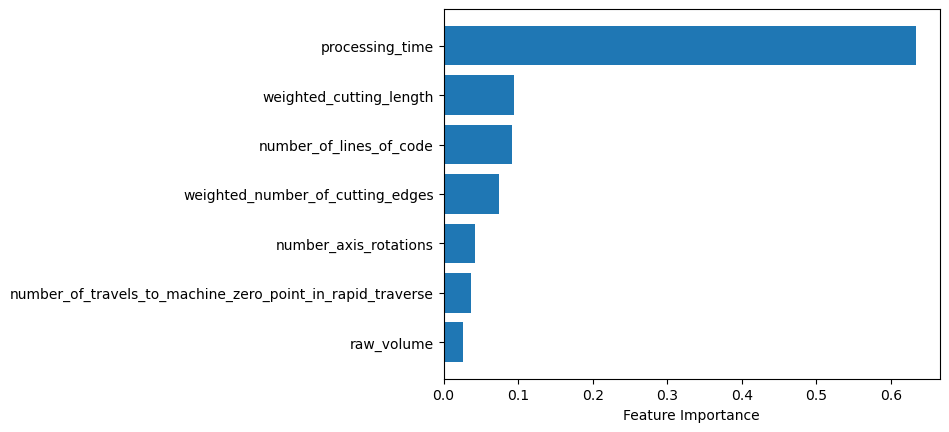

In [21]:
features = [
'number_of_travels_to_machine_zero_point_in_rapid_traverse',
'number_axis_rotations',
'weighted_cutting_length',
'processing_time',
'number_of_lines_of_code',
'weighted_number_of_cutting_edges',
'raw_volume']

target = 'average_power_consumption'

feature_importance(df_cnc, features, target)
plt.show()

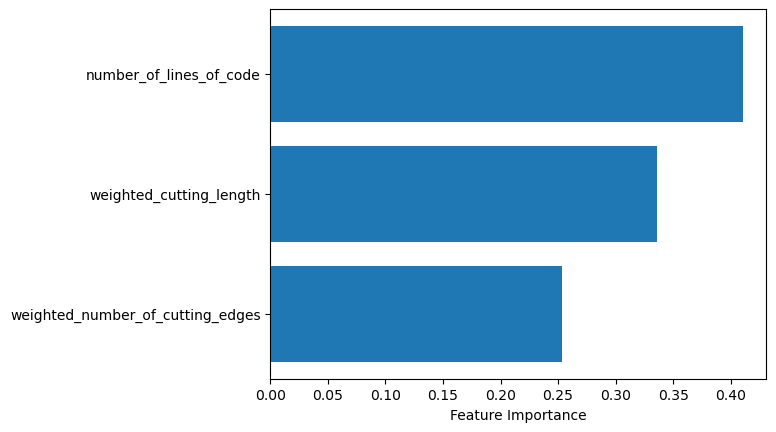

In [22]:
features = [
'weighted_cutting_length',
'number_of_lines_of_code',
'weighted_number_of_cutting_edges']

target = 'average_power_consumption'

feature_importance(df_cnc, features, target)
plt.show()

In [31]:
features = [
'weighted_cutting_length',
'number_of_lines_of_code',
'processing_time',
'weighted_number_of_cutting_edges']

target = 'average_power_consumption'

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [33]:
X = df_cnc[features]
y = df_cnc[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=None)

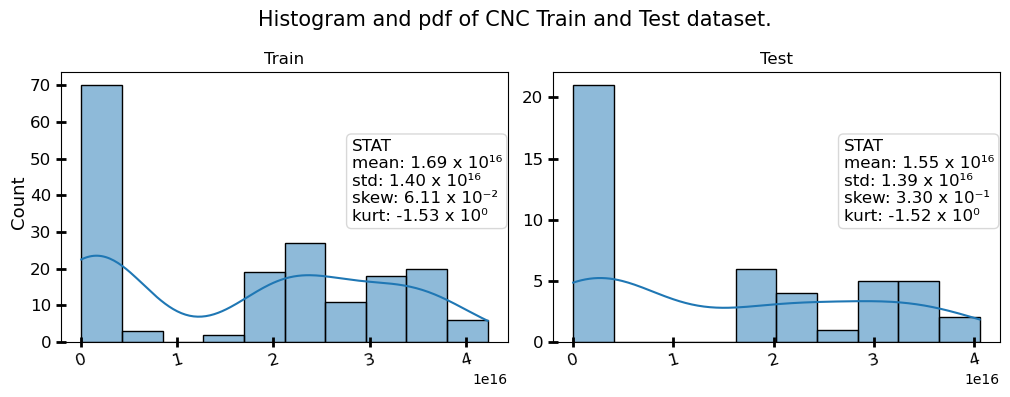

In [34]:
fig, axe = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Histogram and pdf of CNC Train and Test dataset.', size=15)

plotpdf(pd.DataFrame(y_train), 'average_power_consumption', axe[0], bins=10)
plotpdf(pd.DataFrame(y_test), 'average_power_consumption', axe[1], bins=10)
axe[0].set_title('Train')
axe[1].set_title('Test')

fig.text(-0.005, 0.500, 'Count', va='center', rotation='vertical', fontsize=13)
plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

In [35]:
# Create a pipeline for prediction
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

class prediction():
    def __init__(self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        self.run()

    def run(self):
        # Train model
        self.model.fit(self.X_train, self.y_train)
        # Predict
        self.y_pred = self.model.predict(self.X_test)
        self.df_plot = pd.DataFrame({'y_test': (self.y_test).to_list(), 'y_pred': self.y_pred}, index=self.y_test.index)
        return self.y_pred

    def eval(self, eval_dict, name):
        a_dict = {}
        a_dict['mse'] = mse(self.y_test, self.y_pred)
        a_dict['mae'] = mae(self.y_test, self.y_pred)
        a_dict['accuracy'] = np.mean(cross_val_score(self.model, self.X_train, self.y_train))*100
        eval_dict[name] = a_dict

    def plot(self):
        fig, axe = plt.subplots()
        fig.suptitle("Scatter plot of actual and prediction.")
        axe.scatter(x=self.df_plot.index.to_list(), y=self.df_plot['y_test'], label='Actual')
        axe.scatter(x=self.df_plot.index.to_list(), y=self.df_plot['y_pred'], label='Predict')
        axe.legend()
        plt.show()

In [29]:
eval_dict = {}

{'Random Forest': {'mse': 2.5009643715405583e+32,
  'mae': 1.3627739511552274e+16,
  'accuracy': -1.4168526604584164}}

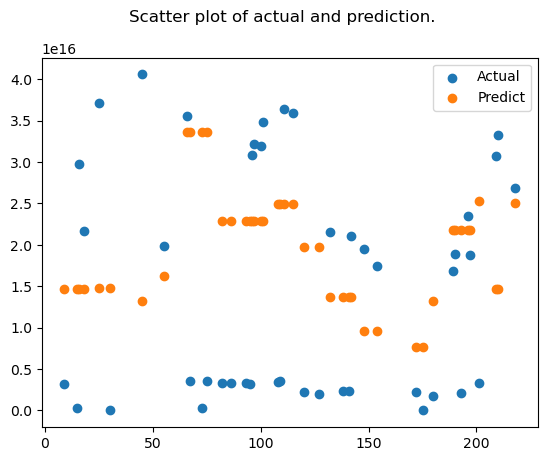

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create model
model = RandomForestRegressor(max_depth=1000, random_state=0)
predict = prediction(model, X_train, X_test, y_train, y_test)

# Evaluation
predict.eval(eval_dict, 'Random Forest')
display(eval_dict)

# Plot
predict.plot()

{'Random Forest': {'mse': 2.5009643715405583e+32,
  'mae': 1.3627739511552274e+16,
  'accuracy': -1.4168526604584164},
 'Linear': {'mse': 2.3291901780822704e+32,
  'mae': 1.3444972138020024e+16,
  'accuracy': 5.094246423675719}}

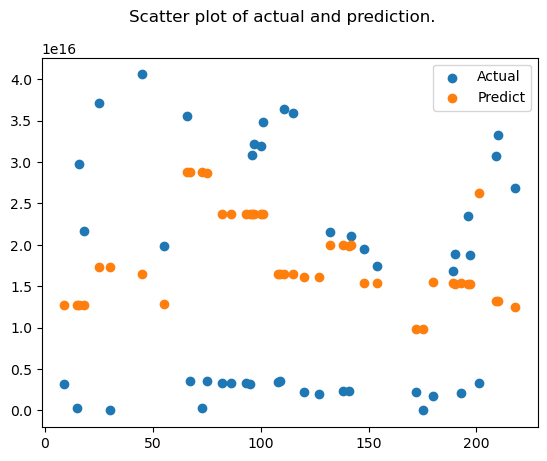

In [36]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()
predict = prediction(model, X_train, X_test, y_train, y_test)

# Evaluation
predict.eval(eval_dict, 'Linear')
display(eval_dict)

# Plot
predict.plot()

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


#Feature standardizing of X
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Create Model
model = SVC(kernel = 'rbf', degree = 2, random_state = 0)
predict = prediction(model, X_train, X_test, y_train, y_test)

# Evaluation
predict.eval(eval_dict, 'Kernel SVM')
display(eval_dict)

# Plot
predict.plot()

ValueError: n_splits=5 cannot be greater than the number of members in each class.